## Basic Stock Analysis 
#### Bryant Crocker 

In [26]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
import quandl 

Quandl is a great free source for daily stock and commodity data. I will use quandl for this analysis.

In [27]:
# Pulling in silver prices from the London Bullion Market Association (LBMA) dataset on Quandl

symbols = ['LBMA/SILVER']
mydata = quandl.get(symbols)

In [32]:
mydata.head()

,LBMA/SILVER - USD,LBMA/SILVER - GBP,LBMA/SILVER - EURO
Date,,,
1968-01-02,2.173,0.90417,NaN
1968-01-03,2.225,0.92500,NaN
1968-01-04,2.171,0.90208,NaN
1968-01-05,2.157,0.89583,NaN
1968-01-08,2.163,0.89792,NaN


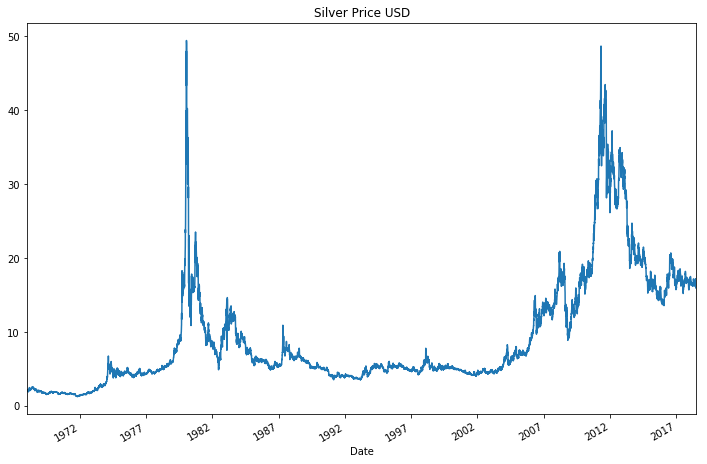

In [37]:
plt.figure(figsize=(12,8))
mydata['logUSD'] = np.log(mydata['LBMA/SILVER - USD'])

mydata['LBMA/SILVER - USD'].plot()
plt.title("Silver Price USD")
plt.show()

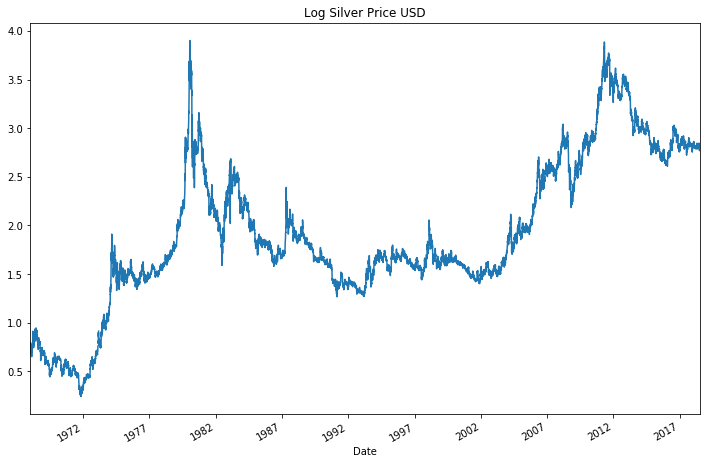

In [36]:
plt.figure(figsize=(12,8))
mydata['logUSD'].plot()
plt.title("Log Silver Price USD")
plt.show()

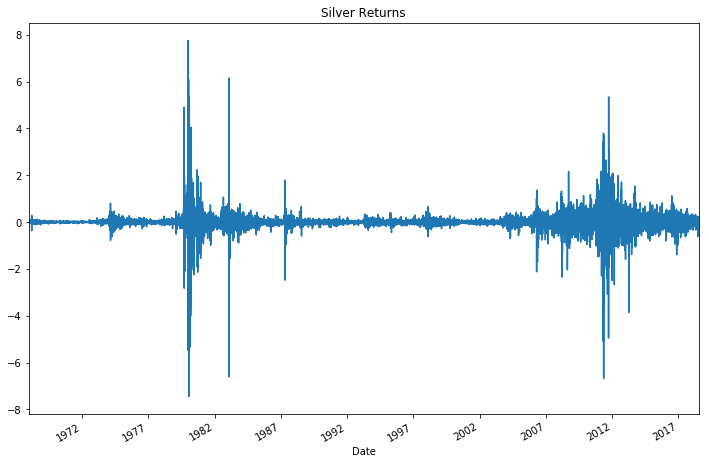

In [38]:
plt.figure(figsize=(12,8))
diff = mydata['LBMA/SILVER - USD'].diff()
diff.plot()
plt.title("Silver Returns")
plt.show()